In [1]:
import os
import urllib.request
import cloudinary.uploader
import numpy as np
import tensorflow as tf
from flask import Flask, jsonify
from keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
img_width, img_height = 224, 224
inv_mapping = {0: 'normal', 1: 'pneumonia', 2: 'COVID-19'}
weightspath = 'model'
metaname = 'model.meta_eval'
ckptname = 'model-6207'
image_tensor_name = 'input_1:0'
pred_tensor_name = 'dense_3/Softmax:0'

sess = None
image_tensor = None
pred_tensor = None

In [3]:
cloudinary.config(
    cloud_name="ds04o8pmi",
    api_key="618563954112198",
    api_secret="17I684A-O6lVnHh0fRQ9IPje1zQ"
)

In [4]:
def load_image(image_path):
    url = cloudinary.utils.cloudinary_url(image_path)
    urllib.request.urlretrieve(url[0], image_path)
    img = cv2.imread(image_path)
    plt.imshow(img)
    img = cv2.resize(img, (img_width, img_height))
    img = img.astype('float32') / 255.0

    return img

In [5]:
def load_model():
    global sess
    global image_tensor
    global pred_tensor

    sess = tf.Session()
    tf.get_default_graph()
    saver = tf.train.import_meta_graph(os.path.join(weightspath, metaname))
    saver.restore(sess, os.path.join(weightspath, ckptname))
    graph = tf.get_default_graph()
    image_tensor = graph.get_tensor_by_name(image_tensor_name)
    pred_tensor = graph.get_tensor_by_name(pred_tensor_name)

In [6]:
def predict(x):
    pred = sess.run(pred_tensor, feed_dict={image_tensor: np.expand_dims(x, axis=0)})
    return pred

In [7]:
def get_prediagnosis(image_url):
    img_tensor = load_image(image_url)
    print ('image loaded')
    result = predict(img_tensor)
    print ('before final return')
    os.remove(image_url)
    print('Prediction: {}'.format(inv_mapping[result.argmax(axis=1)[0]]))

    return result.tolist()

In [8]:
load_model()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from model\model-6207


In [9]:
image_url = 'ex-covid_jieu96.jpeg'

image loaded
before final return
Prediction: COVID-19


[[0.0174122154712677, 0.18041694164276123, 0.8021708726882935]]

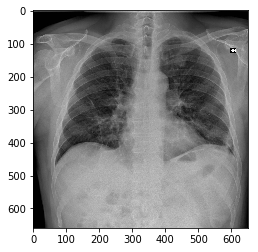

In [10]:
get_prediagnosis(image_url)